# Criminal Image Classification

In [ ]:
from zipfile import ZipFile

In [ ]:
# extracting the data into colab
drive_path = "/content/drive/MyDrive/Colab Notebooks/criminal photos.zip"
with ZipFile(drive_path, "r") as zip_ref:
  zip_ref.extractall(path="/content")

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

In [ ]:
train_dir = "/content/criminal photos/train"

In [ ]:
for dirpath, dirname, filename in os.walk(train_dir):
  print(f"Path: {dirpath}\nNo. of files: {len(filename)}")

Path: /content/criminal photos/train
No. of files: 0
Path: /content/criminal photos/train/ajay
No. of files: 13
Path: /content/criminal photos/train/prakash
No. of files: 12
Path: /content/criminal photos/train/muthu vishal
No. of files: 14
Path: /content/criminal photos/train/saravanan
No. of files: 12
Path: /content/criminal photos/train/kathir
No. of files: 13
Path: /content/criminal photos/train/arif s
No. of files: 14
Path: /content/criminal photos/train/chandru
No. of files: 12
Path: /content/criminal photos/train/adithiyaa
No. of files: 12
Path: /content/criminal photos/train/surya
No. of files: 12
Path: /content/criminal photos/train/sakthivel
No. of files: 12


In [ ]:
# Creating dataset 
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True, 
)

Found 126 files belonging to 10 classes.


In [ ]:
len(train_dataset)

4

In [ ]:
class_names = train_dataset.class_names
class_names

['adithiyaa',
 'ajay',
 'arif s',
 'chandru',
 'kathir',
 'muthu vishal',
 'prakash',
 'sakthivel',
 'saravanan',
 'surya']

In [ ]:
sample_img, sample_label = next(iter(train_dataset))
sample_img.shape, sample_label.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

In [ ]:
sample_label[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([7, 5, 4, 2, 0], dtype=int32)>

In [ ]:
sample_img[0].shape

TensorShape([224, 224, 3])

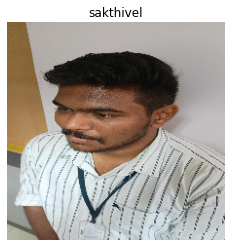

In [ ]:
# plotting an image
img = sample_img[0]/255.
label = sample_label[0]

plt.imshow(img)
plt.title(class_names[label])
plt.axis(False);

In [ ]:
# creating data augmentation layer
data_augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=0.3),
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomZoom(height_factor=(-0.2, -0.3)),
])
data_augmentation_layer

In [ ]:
sample_img = tf.expand_dims(sample_img[0]/255., axis=0)
sample_img.shape

TensorShape([1, 224, 224, 3])

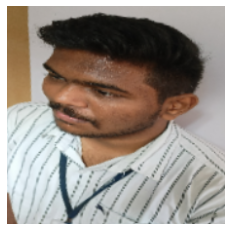

In [ ]:
plt.imshow(tf.squeeze(data_augmentation_layer(sample_img))) # check with the same shape as train data
plt.axis(False);

In [ ]:
aug_img = data_augmentation_layer(sample_img)
aug_img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
data_augmentation_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
img_save_path = "/content/criminal photos/train/"

In [ ]:
img_save_path + class_names[0]

'/content/criminal photos/train/adithiyaa'

In [ ]:
# Augmenting the available data
img_no = 0
for X, y in train_dataset.unbatch():
  for i in range(5):
    img_save = tf.expand_dims(X/255., axis=0)
    img_save = data_augmentation_layer(img_save)
    img_save = tf.squeeze(img_save)
    tf.keras.utils.save_img(path = img_save_path + class_names[y] + f"/mod{img_no}.png", x=img_save)
    img_no+=1
    #print(img_save.shape)

Streaming output truncated to the last 5000 lines.


In [ ]:
# saving to zip
import shutil
shutil.make_archive("modified_criminal_photos", "zip", "/content/criminal photos")
print("Sucessfully compressed to zip format")

Sucessfully compressed to zip format


In [ ]:
# saving to drive
shutil.copy2("/content/modified_criminal_photos.zip", "/content/drive/MyDrive/Colab Notebooks/modified_criminal_photos.zip")

'/content/drive/MyDrive/Colab Notebooks/modified_criminal_photos.zip'

In [1]:
from zipfile import ZipFile

# extracting the augmented data into colab
drive_path = "/content/drive/MyDrive/Colab Notebooks/modified_criminal_photos.zip"
with ZipFile(drive_path, "r") as zip_ref:
  zip_ref.extractall(path="/content/modified_criminal_photos")

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
train_dir = "/content/modified_criminal_photos/train"

In [4]:
for dirpath, dirname, filename in os.walk(train_dir):
  print(f"Path: {dirpath}\nNo. of files: {len(filename)}")

Path: /content/modified_criminal_photos/train
No. of files: 0
Path: /content/modified_criminal_photos/train/ajay
No. of files: 78
Path: /content/modified_criminal_photos/train/prakash
No. of files: 72
Path: /content/modified_criminal_photos/train/muthu vishal
No. of files: 84
Path: /content/modified_criminal_photos/train/saravanan
No. of files: 72
Path: /content/modified_criminal_photos/train/kathir
No. of files: 78
Path: /content/modified_criminal_photos/train/arif s
No. of files: 84
Path: /content/modified_criminal_photos/train/chandru
No. of files: 72
Path: /content/modified_criminal_photos/train/adithiyaa
No. of files: 72
Path: /content/modified_criminal_photos/train/surya
No. of files: 72
Path: /content/modified_criminal_photos/train/sakthivel
No. of files: 72


In [5]:
# Creating a new dataset with augmented images
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True, 
)

Found 756 files belonging to 10 classes.


In [6]:
class_names = train_dataset.class_names
class_names

['adithiyaa',
 'ajay',
 'arif s',
 'chandru',
 'kathir',
 'muthu vishal',
 'prakash',
 'sakthivel',
 'saravanan',
 'surya']

In [7]:
sample_img, sample_label = next(iter(train_dataset))
sample_img.shape, sample_label.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

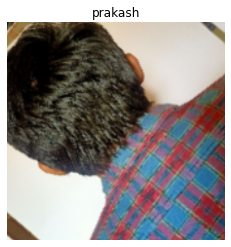

In [8]:
# plotting an image
img = sample_img[0]/255.
label = sample_label[0]

plt.imshow(img)
plt.title(class_names[label])
plt.axis(False);

In [9]:
# setting random seed
tf.random.set_seed(42)

# creating a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(filters=256, kernel_size=2, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=2, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=2, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(len(class_names), activation="softmax")
], name="Conv2d_model")

model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

model_1_history = model_1.fit(train_dataset, epochs=10)

Epoch 1/10
24/24 [==============================] - 28s 410ms/step - loss: 2.2888 - accuracy: 0.1892
Epoch 2/10
24/24 [==============================] - 11s 348ms/step - loss: 1.5749 - accuracy: 0.4061
Epoch 3/10
24/24 [==============================] - 12s 387ms/step - loss: 1.0306 - accuracy: 0.6362
Epoch 4/10
24/24 [==============================] - 12s 374ms/step - loss: 0.6261 - accuracy: 0.7817
Epoch 5/10
24/24 [==============================] - 11s 350ms/step - loss: 0.4585 - accuracy: 0.8452
Epoch 6/10
24/24 [==============================] - 12s 375ms/step - loss: 0.3262 - accuracy: 0.8836
Epoch 7/10
24/24 [==============================] - 12s 385ms/step - loss: 0.0879 - accuracy: 0.9815
Epoch 8/10
24/24 [==============================] - 12s 349ms/step - loss: 0.0256 - accuracy: 0.9987
Epoch 9/10
24/24 [==============================] - 13s 368ms/step - loss: 0.0159 - accuracy: 0.9987
Epoch 10/10
24/24 [==============================] - 16s 539ms/step - loss: 0.0128 - accura

In [10]:
def preprocess(img_path):
  """
  Preprocesses the image for prediction
  """
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=(224, 224))
  img = tf.expand_dims(img, axis=0)

  return img

In [11]:
def plot_loss_curves(model_history, val_curve=False):
  """
  Plots the given model's loss and accuracy curves
  """
  train_acc = model_history["accuracy"]
  train_loss = model_history["loss"]

  if val_curve:
    val_acc = model_history["val_accuracy"]
    val_loss = model_history["val_loss"]
    plot = 2
  
  else:
    plot = 1
  
  plt.figure(figsize=(10, 7))
  plt.subplot(plot, 2, 1)
  plt.plot(train_acc, label="Train_Accuracy")
  plt.legend();
  
  plt.subplot(plot, 2, 2)
  plt.plot(train_loss, label="Train_Loss", c="r")

  plt.title("Loss and Accuracy Curves")
  plt.legend();

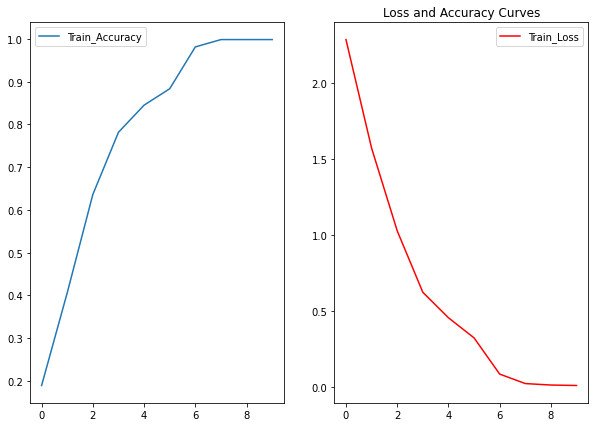

In [12]:
plot_loss_curves(model_1_history.history)

In [13]:
model_1.evaluate(train_dataset)

24/24 [==============================] - 19s 504ms/step - loss: 0.0152 - accuracy: 0.9960


[0.015245433896780014, 0.9960317611694336]

len(pred_probs[0])

In [18]:
# predicted class name
pred_class = class_names[pred_probs.argmax(axis=1).item()]
pred_class

'saravanan'

In [19]:
def custom_image(img_path, model, org_class):
  """
  Plots the given image and make prediction
  """
  img = preprocess(img_path)
  pred_probs = model.predict(img)
  pred_class = pred_probs.argmax(axis=1).item()
  pred_class = class_names[pred_class]
  pred_prob = pred_probs.max(axis=1)[0]*100
  
  if pred_class == org_class:
    color="g"
  else:
    color="r"

  plt.imshow(tf.squeeze(img)/255.)
  plt.axis(False)
  plt.suptitle(f"Actual: {org_class}", c="g")
  plt.title(f"Pred: {pred_class} | Prob: {pred_prob:.2f} %", c=color);

1/1 [==============================] - 0s 19ms/step


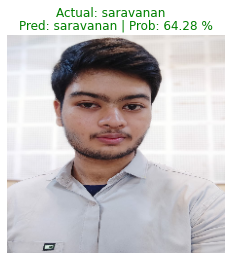

In [20]:
custom_image(img_path="/content/drive/MyDrive/Colab Notebooks/sarv.jpg",
             model=model_1,
             org_class="saravanan")

In [ ]:
# saving the model
model_1.save(filepath="/content/drive/MyDrive/Colab Notebooks/model_1_Conv2D")

In [ ]:
# load the saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_1_Conv2D")
loaded_model.summary()